# Extração

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [111]:
file_path = '/content/dados_tratados.csv'
df = pd.read_csv(file_path)
df.head()


,ID_Cliente,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_Diaria
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# Ajustes pre ML

In [112]:
df.drop(columns=['ID_Cliente'], inplace=True)
df.head()


,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Cobranca_Diaria
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [113]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
colunas_categoricas.tolist()

['Multiplas_Linhas',
 'Servico_Internet',
 'Seguranca_Online',
 'Backup_Online',
 'Protecao_Dispositivo',
 'Suporte_Tecnico',
 'Streaming_TV',
 'Streaming_Filmes',
 'Contrato',
 'Metodo_Pagamento']

In [114]:
df_final = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [115]:
df_final.head()

,Churn,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefonico,Fatura_Online,Cobranca_Mensal,Cobranca_Total,...,Suporte_Tecnico_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Contrato_One year,Contrato_Two year,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7032 non-null   int64  
 1   Genero                                    7032 non-null   int64  
 2   Idoso                                     7032 non-null   int64  
 3   Possui_Parceiro                           7032 non-null   int64  
 4   Possui_Dependentes                        7032 non-null   int64  
 5   Meses_Contrato                            7032 non-null   int64  
 6   Servico_Telefonico                        7032 non-null   int64  
 7   Fatura_Online                             7032 non-null   int64  
 8   Cobranca_Mensal                           7032 non-null   float64
 9   Cobranca_Total                            7032 non-null   float64
 10  Cobranca_Diaria                     

# Verificação da Proporção de Evasão

In [52]:
contagem_raw = df_final['Churn'].value_counts()
proporcao_percentual = df_final['Churn'].value_counts(normalize=True) * 100

In [55]:
print(f"Cancelaram: {contagem_raw[1]} = {proporcao_percentual[1]:.2f}% Continuaram: {contagem_raw[0]} = {proporcao_percentual[0]:.2f}%")

Cancelaram: 1869 = 26.58% Continuaram: 5163 = 73.42%


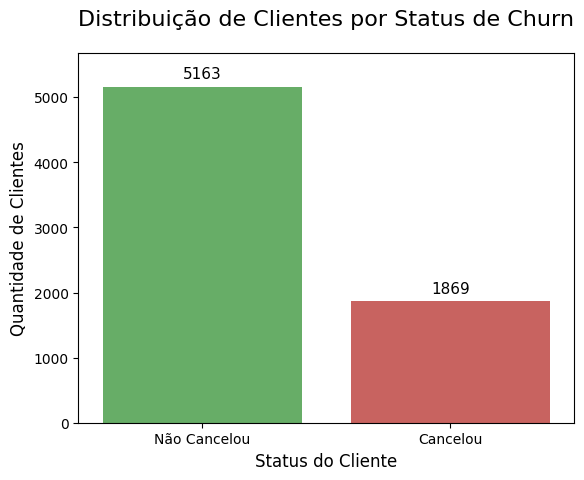

In [118]:
plt.figure()
plot = sns.countplot(x='Churn', hue='Churn', data=df_final,
                     palette=['#5cb85c', '#d9534f'],
                     order=contagem_raw.index,
                     legend=False)

plot.set_xticks([0, 1])
plot.set_xticklabels(['Não Cancelou', 'Cancelou'])

plt.title('Distribuição de Clientes por Status de Churn', fontsize=16, pad=20)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.ylim(0, max(contagem_raw) * 1.1)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points',
                  fontsize=11)

plt.show()

# Padronização dos Dado

In [119]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled_df.head())

     Genero     Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0  0.994150 -0.439607         1.040462           -0.658397        0.184279   
1  0.994150 -0.439607         1.040462            1.518841        1.443383   
2 -1.005884  2.274760        -0.961111           -0.658397       -1.196675   
3  0.994150 -0.439607         1.040462           -0.658397       -0.952977   
4 -1.005884 -0.439607         1.040462            1.518841        0.955988   

   Servico_Telefonico  Fatura_Online  Cobranca_Mensal  Cobranca_Total  \
0            0.330197      -1.221575        -1.479254       -0.698974   
1            0.330197       0.818615         1.155008        1.923342   
2            0.330197      -1.221575         0.300203       -0.919135   
3            0.330197       0.818615         0.137225       -0.744566   
4            0.330197      -1.221575         0.012497        0.537220   

   Cobranca_Diaria  ...  Suporte_Tecnico_Yes  \
0        -1.479254  ...            -0.637102

In [70]:
print(X_train_scaled_df.describe())

             Genero         Idoso  Possui_Parceiro  Possui_Dependentes  \
count  5.625000e+03  5.625000e+03     5.625000e+03        5.625000e+03   
mean  -3.157968e-17 -2.210577e-17    -3.915880e-17       -1.800042e-17   
std    1.000089e+00  1.000089e+00     1.000089e+00        1.000089e+00   
min   -1.005884e+00 -4.396068e-01    -9.611111e-01       -6.583967e-01   
25%   -1.005884e+00 -4.396068e-01    -9.611111e-01       -6.583967e-01   
50%    9.941504e-01 -4.396068e-01    -9.611111e-01       -6.583967e-01   
75%    9.941504e-01 -4.396068e-01     1.040462e+00        1.518841e+00   
max    9.941504e-01  2.274760e+00     1.040462e+00        1.518841e+00   

       Meses_Contrato  Servico_Telefonico  Fatura_Online  Cobranca_Mensal  \
count    5.625000e+03        5.625000e+03   5.625000e+03     5.625000e+03   
mean     5.115908e-17        8.210716e-17  -1.187396e-16    -5.052748e-18   
std      1.000089e+00        1.000089e+00   1.000089e+00     1.000089e+00   
min     -1.277907e+00    

In [75]:
correlation_matrix = df_final.corr()
corr_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(corr_with_churn)

Churn                                       1.000000
Servico_Internet_Fiber optic                0.307463
Metodo_Pagamento_Electronic check           0.301455
Cobranca_Diaria                             0.192858
Cobranca_Mensal                             0.192858
Fatura_Online                               0.191454
Idoso                                       0.150541
Streaming_TV_Yes                            0.063254
Streaming_Filmes_Yes                        0.060860
Multiplas_Linhas_Yes                        0.040033
Servico_Telefonico                          0.011691
Genero                                     -0.008545
Multiplas_Linhas_No phone service          -0.011691
Protecao_Dispositivo_Yes                   -0.066193
Backup_Online_Yes                          -0.082307
Metodo_Pagamento_Mailed check              -0.090773
Metodo_Pagamento_Credit card (automatic)   -0.134687
Possui_Parceiro                            -0.149982
Possui_Dependentes                         -0.

# Análise de Correlação

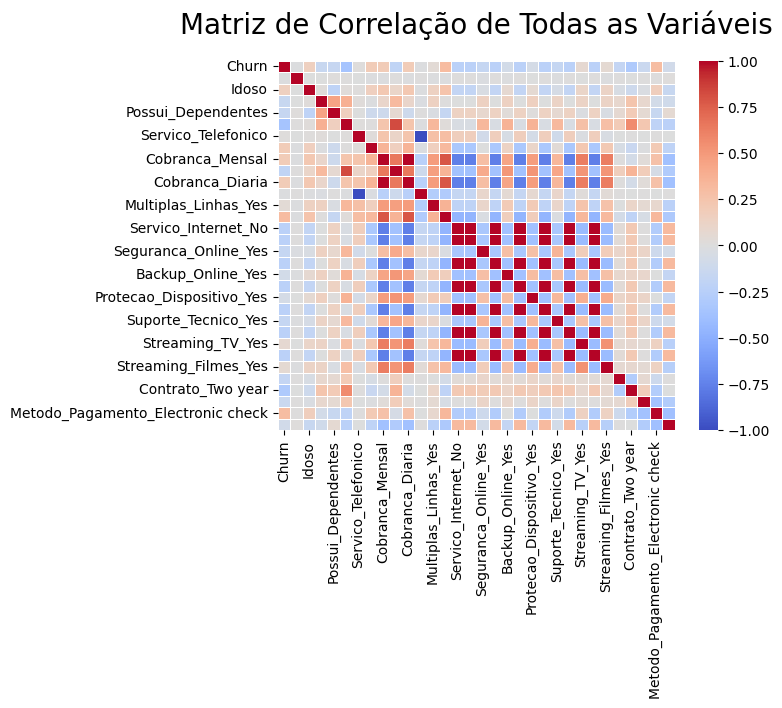

In [78]:
plt.figure()
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=20, pad=20)
plt.show()

### Fortes Indicadores de CHURN (Correlação Positiva)

* **`Servico_Internet_Fiber optic` (0.31):** Ter fibra ótica é o fator isolado com a maior associação positiva com o cancelamento. Isso pode indicar problemas com esse serviço específico (preço, instabilidade, etc.).
* **`Metodo_Pagamento_Electronic check` (0.30):** Clientes que pagam com cheque eletrônico têm uma tendência muito maior a cancelar.
* **`Cobranca_Mensal` / `Cobranca_Diaria` (0.19):** Quanto maior a cobrança, maior a chance de churn. Faz todo sentido.

### Fortes Indicadores de RETENÇÃO (Correlação Negativa)

* **`Meses_Contrato` (-0.35):** Esta é a correlação mais forte de todas (em magnitude). Quanto mais tempo um cliente está na base (maior a "tenure"), menor a chance dele cancelar. A lealdade é um fator chave.
* **`Contrato_Two year` (-0.30):** Clientes com contrato de dois anos são muito menos propensos a cancelar. O tipo de contrato é um preditor poderosíssimo.
* **`Servico_Internet_No` (-0.23):** Clientes que não possuem serviço de internet da empresa (apenas telefone, por exemplo) têm uma baixa taxa de cancelamento.

# Análises Direcionadas

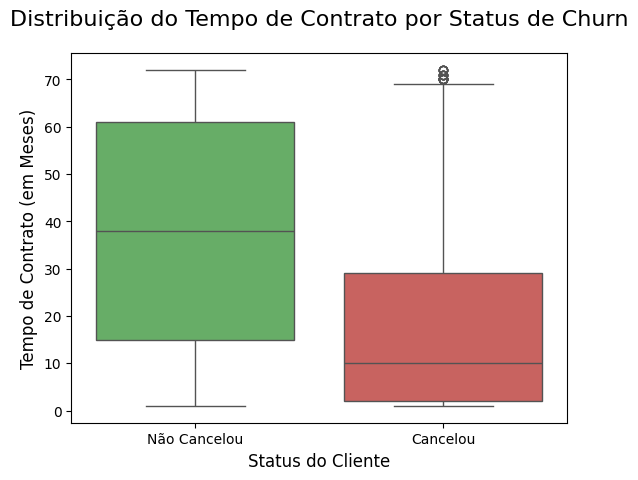

In [120]:
plt.figure()

sns.boxplot(x='Churn', y='Meses_Contrato', hue='Churn',
            data=df, palette=['#5cb85c', '#d9534f'], legend=False)

plt.title('Distribuição do Tempo de Contrato por Status de Churn', fontsize=16, pad=20)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Contrato (em Meses)', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])

plt.show()

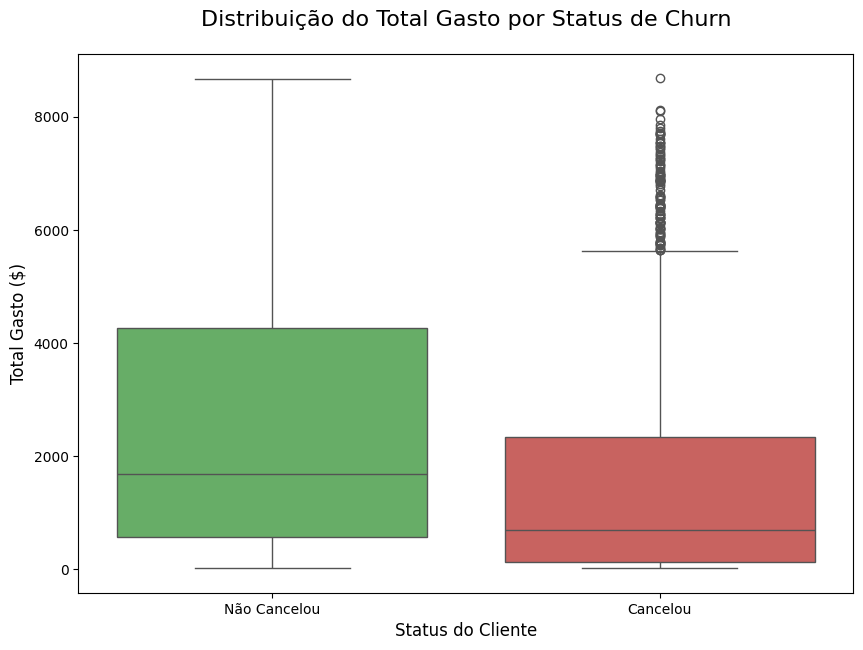

In [121]:
plt.figure(figsize=(10, 7))

sns.boxplot(x='Churn', y='Cobranca_Total', hue='Churn',
            data=df, palette=['#5cb85c', '#d9534f'], legend=False)

plt.title('Distribuição do Total Gasto por Status de Churn', fontsize=16, pad=20)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])

plt.show()

# Criação de Modelos

Modelo 1: Regressão Logística

In [86]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

Modelo 2: Random Forest

In [87]:
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Avaliação dos Modelos

In [97]:
print("\nResultados da Regressão Logística:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))



Resultados da Regressão Logística:
Acurácia: 0.8010
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [98]:
print("\nResultados do Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rand_forest):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rand_forest))


Resultados do Random Forest:
Acurácia: 0.7846
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



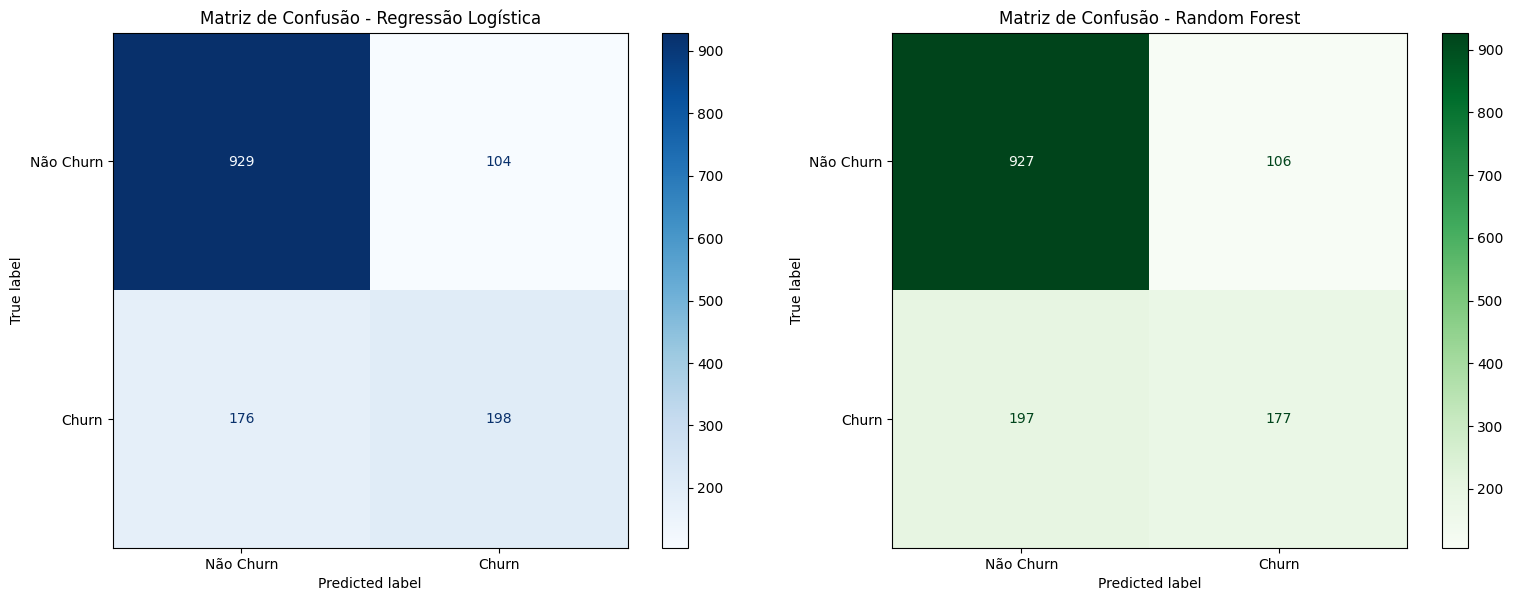

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Não Churn', 'Churn'])
disp_log_reg.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Matriz de Confusão - Regressão Logística')


cm_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
disp_rand_forest = ConfusionMatrixDisplay(confusion_matrix=cm_rand_forest, display_labels=['Não Churn', 'Churn'])
disp_rand_forest.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Matriz de Confusão - Random Forest')

plt.tight_layout()
plt.show()

Análise de Overfitting/Underfitting

In [100]:
print("\nRegressão Logística:")
print(f"  Acurácia de Treino: {log_reg.score(X_train_scaled, y_train):.4f}")
print(f"  Acurácia de Teste:  {log_reg.score(X_test_scaled, y_test):.4f}")

print("\nRandom Forest:")
print(f"  Acurácia de Treino: {rand_forest.score(X_train, y_train):.4f}")
print(f"  Acurácia de Teste:  {rand_forest.score(X_test, y_test):.4f}")


Regressão Logística:
  Acurácia de Treino: 0.8076
  Acurácia de Teste:  0.8010

Random Forest:
  Acurácia de Treino: 0.9977
  Acurácia de Teste:  0.7846


# Análise Final dos Modelos

### Qual modelo teve o melhor desempenho?

O modelo com o melhor desempenho foi a **Regressão Logística**.

Embora a acurácia geral de ambos os modelos tenha sido próxima, a Regressão Logística foi superior na tarefa mais importante para o negócio: identificar corretamente os clientes que cancelam. Ela obteve um **Recall de 0.53** e um **F1-Score de 0.59** para a classe "Churn", superando o Random Forest (Recall de 0.47 e F1-Score de 0.54). Em resumo, ela é mais eficaz para a ação de retenção de clientes.

### Algum modelo apresentou overfitting ou underfitting?

Sim, houve um caso claro de overfitting.

-   **Random Forest (Overfitting):** Sim. Este modelo apresentou um desempenho quase perfeito nos dados de treino (acurácia de **99.77%**) que não se sustentou nos dados de teste (acurácia de **78.46%**). Essa grande queda de performance indica que o modelo "decorou" os dados de treino e tem baixa capacidade de generalização.
    -   **Causa provável:** A complexidade natural do modelo, que criou árvores de decisão muito específicas para os dados de treino.
    -   **Ajuste futuro:** Reduzir a complexidade do modelo, por exemplo, limitando a profundidade máxima das árvores (`max_depth`).

-   **Regressão Logística (Modelo Estável):** Não. A performance no treino (**80.76%**) e no teste (**80.10%**) foi muito similar, demonstrando que o modelo é estável e generaliza bem para novos dados.

In [105]:
print("\n--- Análise das Variáveis: Regressão Logística ---")
coeficientes = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coeficiente'])
coeficientes['Impacto_Absoluto'] = np.abs(coeficientes['Coeficiente'])
coeficientes_ordenados = coeficientes.sort_values(by='Impacto_Absoluto', ascending=False)

print("As 10 variáveis com maior impacto (positivo ou negativo) no Churn:")
print(coeficientes_ordenados.head(10))


--- Análise das Variáveis: Regressão Logística ---
As 10 variáveis com maior impacto (positivo ou negativo) no Churn:
                              Coeficiente  Impacto_Absoluto
Meses_Contrato                  -1.313607          1.313607
Servico_Internet_Fiber optic     0.644955          0.644955
Cobranca_Total                   0.609028          0.609028
Contrato_Two year               -0.565938          0.565938
Cobranca_Diaria                 -0.336935          0.336935
Cobranca_Mensal                 -0.336935          0.336935
Contrato_One year               -0.290447          0.290447
Streaming_TV_Yes                 0.240530          0.240530
Fatura_Online                    0.181353          0.181353
Streaming_Filmes_Yes             0.170661          0.170661


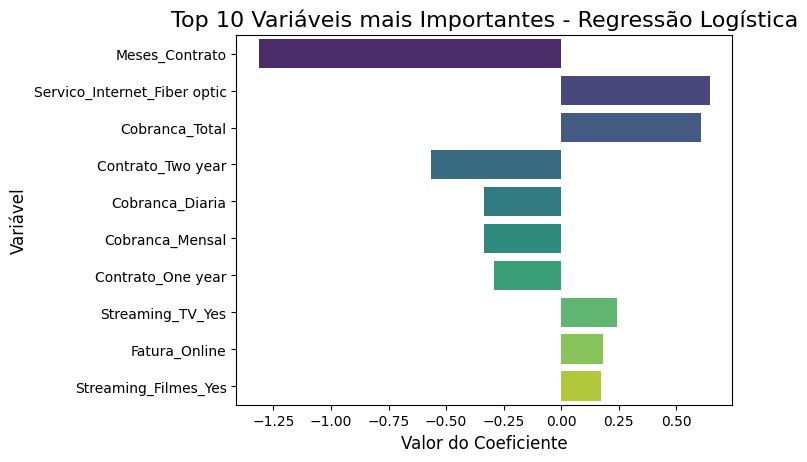

In [123]:
plt.figure()
top_10_coef = coeficientes_ordenados.head(10)

sns.barplot(x=top_10_coef['Coeficiente'],
            y=top_10_coef.index,
            hue=top_10_coef.index,
            palette='viridis',
            legend=False)

plt.title('Top 10 Variáveis mais Importantes - Regressão Logística', fontsize=16)
plt.xlabel('Valor do Coeficiente', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

In [125]:
print("\n--- Análise das Variáveis: Random Forest ---")
importancias = pd.DataFrame(rand_forest.feature_importances_, index=X.columns, columns=['Importancia'])
importancias_ordenadas = importancias.sort_values(by='Importancia', ascending=False)

print("As 10 variáveis mais importantes para o modelo:")
print(importancias_ordenadas.head(10))



--- Análise das Variáveis: Random Forest ---
As 10 variáveis mais importantes para o modelo:
                                   Importancia
Cobranca_Total                        0.165521
Meses_Contrato                        0.152359
Cobranca_Diaria                       0.132268
Cobranca_Mensal                       0.128880
Metodo_Pagamento_Electronic check     0.037309
Servico_Internet_Fiber optic          0.036263
Contrato_Two year                     0.034886
Genero                                0.024165
Fatura_Online                         0.023611
Suporte_Tecnico_Yes                   0.022647


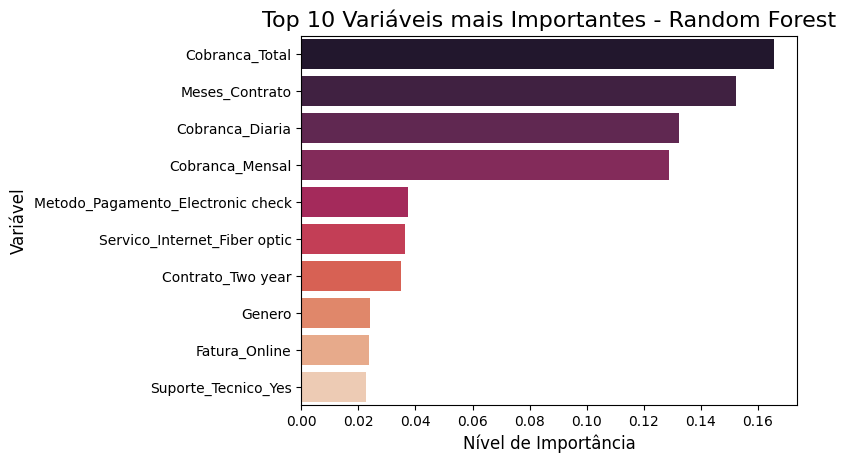

In [129]:
plt.figure()
top_10_imp = importancias_ordenadas.head(10)

sns.barplot(x=top_10_imp['Importancia'],
            y=top_10_imp.index,
            hue=top_10_imp.index,
            palette='rocket',
            legend=False)

plt.title('Top 10 Variáveis mais Importantes - Random Forest', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

# Relatório Final

## Objetivo do Projeto

O objetivo deste projeto foi desenvolver um modelo de Machine Learning capaz de prever com acurácia quais clientes da Telecom X têm maior probabilidade de cancelar seus serviços (churn). Adicionalmente, o projeto visou identificar os principais fatores que influenciam essa decisão, a fim de embasar a criação de estratégias de retenção mais eficazes.

## Resumo da Metodologia

O projeto seguiu um pipeline estruturado de Machine Learning:

1.  **Preparação dos Dados:** Os dados brutos foram carregados, limpos e transformados. Variáveis categóricas foram convertidas para formato numérico através de *One-Hot Encoding*.
2.  **Análise Exploratória:** Investigamos a correlação entre as variáveis e a relação de fatores-chave (como tempo de contrato e valor gasto) com o churn.
3.  **Modelagem:** Dois modelos de classificação foram treinados e avaliados:
    * **Regressão Logística:** Um modelo linear, robusto e altamente interpretável.
    * **Random Forest:** Um modelo de ensemble baseado em árvores, conhecido por sua alta performance.
4.  **Avaliação:** Os modelos foram rigorosamente comparados utilizando métricas como Acurácia, Precisão, Recall e F1-Score, além da análise de *overfitting*.
5.  **Interpretação:** Extraímos a importância das variáveis de cada modelo para entender os principais fatores preditivos.

## Seleção do Modelo de Melhor Desempenho

Após a fase de avaliação, o modelo de **Regressão Logística** foi selecionado como a solução mais adequada para este problema de negócio.

**Justificativa:**

* **Melhor Performance no Objetivo de Negócio:** A Regressão Logística apresentou um **Recall de 0.53** e um **F1-Score de 0.59** para a classe "Churn", superando o Random Forest. Isso significa que ela é mais eficaz em sua principal missão: **identificar corretamente os clientes que irão cancelar**.
* **Modelo Confiável e Estável:** O modelo demonstrou excelente generalização, com uma performance de treino (80.76%) e teste (80.10%) quase idênticas. Em contraste, o Random Forest apresentou forte *overfitting* (99.77% no treino vs. 78.46% no teste), tornando-o menos confiável para previsões em dados futuros.

## Fatores-Chave que Influenciam o Churn

A análise de importância das variáveis revelou um perfil claro dos clientes com maior e menor risco de evasão.

#### Fatores de Alto Risco (Aumentam a Chance de Churn):

1.  **Tipo de Contrato Mês a Mês:** É o fator de maior risco. Clientes sem um vínculo de longo prazo são muito mais voláteis.
2.  **Serviço de Internet Fibra Ótica:** Clientes com este serviço apresentaram uma propensão significativamente maior a cancelar, o que pode indicar problemas de preço, qualidade ou concorrência.
3.  **Método de Pagamento via Cheque Eletrônico:** Este método de pagamento está fortemente associado a clientes que cancelam.
4.  **Baixo Tempo de Contrato (Tenure):** Clientes nos primeiros meses são os mais propensos a sair.

#### Fatores de Alta Retenção (Diminuem a Chance de Churn):

1.  **Longo Tempo de Contrato (Tenure):** É o fator de retenção mais forte. Quanto mais tempo um cliente permanece, mais leal ele se torna.
2.  **Contratos de Longo Prazo (Um e Dois Anos):** Clientes com contratos mais longos têm uma chance drasticamente menor de cancelar.
3.  **Serviços Adicionais:** A adesão a serviços como Suporte Técnico e Segurança Online está associada a uma menor taxa de churn.

## Recomendações Estratégicas para Retenção

Com base nos fatores identificados, propomos as seguintes estratégias data-driven para a Telecom X:

#### **Ação 1: Migração de Contratos de Risco**
* **Insight:** Clientes com contrato "Mês a Mês" são a maior fonte de churn.
* **Estratégia:** Criar campanhas proativas oferecendo um benefício claro (ex: desconto na mensalidade, um mês grátis, upgrade de serviço) para que estes clientes migrem para um contrato de 1 ou 2 anos, aumentando a barreira de saída.

#### **Ação 2: Investigar a Experiência do Cliente de Fibra Ótica**
* **Insight:** O serviço de Fibra, que deveria ser um diferencial, está associado ao churn.
* **Estratégia:** Realizar uma auditoria completa da jornada deste cliente. A causa é o preço, a instabilidade da conexão, a qualidade da instalação ou o suporte técnico? Pesquisas de satisfação direcionadas a este público podem revelar a causa raiz do problema.

#### **Ação 3: Incentivar Métodos de Pagamento Seguros**
* **Insight:** O pagamento via "Cheque Eletrônico" é um sinal de alerta.
* **Estratégia:** Oferecer um pequeno incentivo (ex: R$5 de desconto na primeira fatura) para clientes que mudarem seu método de pagamento para Débito Automático ou Cartão de Crédito, que são mais convenientes e indicam um maior comprometimento.

#### **Ação 4: Fortalecer o Relacionamento nos Primeiros Meses**
* **Insight:** O churn é mais comum em clientes novos.
* **Estratégia:** Desenvolver um programa de "Onboarding" para clientes nos primeiros 90 dias. Este programa deve incluir comunicação focada em educar sobre os serviços, garantir que a instalação foi bem-sucedida e reforçar os benefícios de ser um cliente Telecom X, criando uma conexão emocional e de valor logo no início.